In [14]:
# Importing Packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Input data files

import os


In [15]:
# Loading the Data
sales = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
sales.sort_values(by=['ORDERNUMBER'])

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
578,10100,30,100.00,3,5151.00,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2024,10100,49,34.47,1,1689.03,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
680,10100,50,67.80,2,3390.00,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
1267,10100,22,86.51,4,1903.22,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
728,10101,25,100.00,4,3782.00,1/9/2003 0:00,Shipped,1,1,2003,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,10425,18,100.00,2,1895.94,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small
393,10425,33,100.00,4,4692.60,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium
160,10425,38,100.00,12,5894.94,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium
780,10425,19,49.22,10,935.18,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small


In [16]:
# Rename columns in lowercase
sales.columns= sales.columns.str.lower()

In [17]:
sales.columns.values

array(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'territory', 'contactlastname', 'contactfirstname',
       'dealsize'], dtype=object)

In [18]:
sales.describe()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,qtr_id,month_id,year_id,msrp
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [19]:
# Checking null values
sales.isnull().sum()

,0
ordernumber,0
quantityordered,0
priceeach,0
orderlinenumber,0
sales,0
orderdate,0
status,0
qtr_id,0
month_id,0
year_id,0


In [20]:
# Checking duplicate values
len(sales) == len(sales.drop_duplicates())

True

In [21]:
# Determining Countries with null valued Territory
sales.loc[sales['territory'].isnull()]['country'].unique()

array(['USA', 'Canada'], dtype=object)

In [22]:
# Assigning North America Territory values
sales['territory'] = sales['territory'].fillna('NAM')
sales['territory'].unique()

array(['NAM', 'EMEA', 'APAC', 'Japan'], dtype=object)

In [23]:
# Removing the In Process and Cancelled orders
sales['status'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [24]:
sales1 = sales[~((sales['status'] == 'Cancelled') | (sales['status'] == 'On Hold'))]
sales1['status'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Resolved'], dtype=object)

<ipython-input-25-8cdf25b09312>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = sales1['sales'])


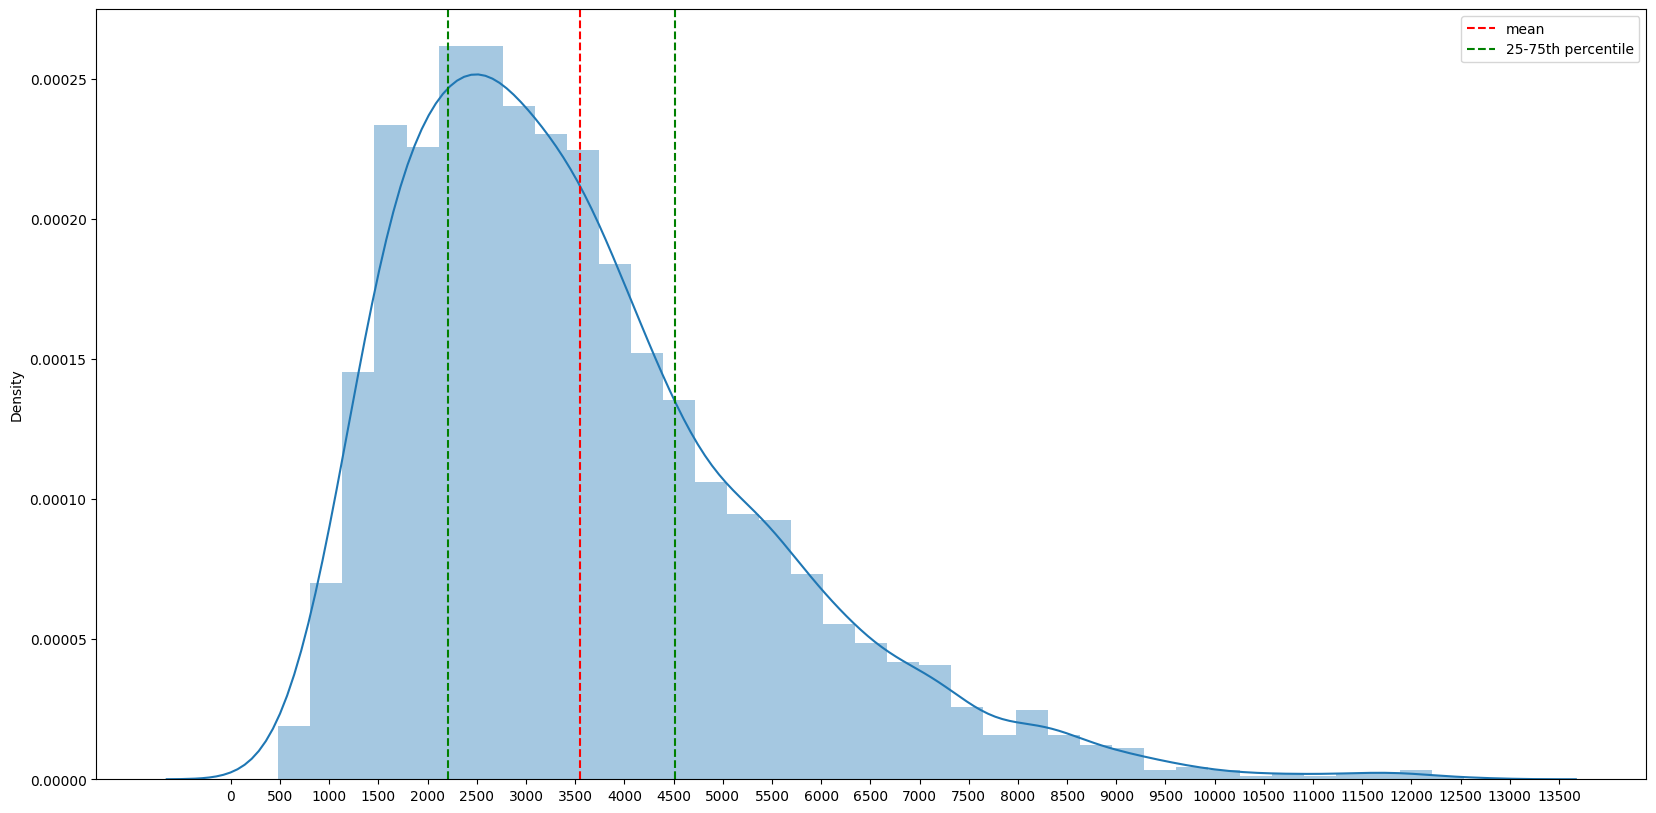

In [25]:
# Sales Distribution

plt.figure(figsize=(20,10))
sns.distplot(x = sales1['sales'])
plt.axvline(x = np.mean(sales1['sales']), c = 'red', ls = '--', label = 'mean')
plt.axvline(x = np.percentile(sales1['sales'], 25), c = 'green', ls = '--', label = '25-75th percentile')
plt.axvline(x = np.percentile(sales1['sales'], 75), c = 'green', ls = '--')
plt.xticks(np.arange(0,14000,500))
plt.legend()
plt.show()

<span style="font-size:18px;">Sales distribution is right skewed. Most of the sales are between 2000-2500. Mean sale is around 3500. </span>

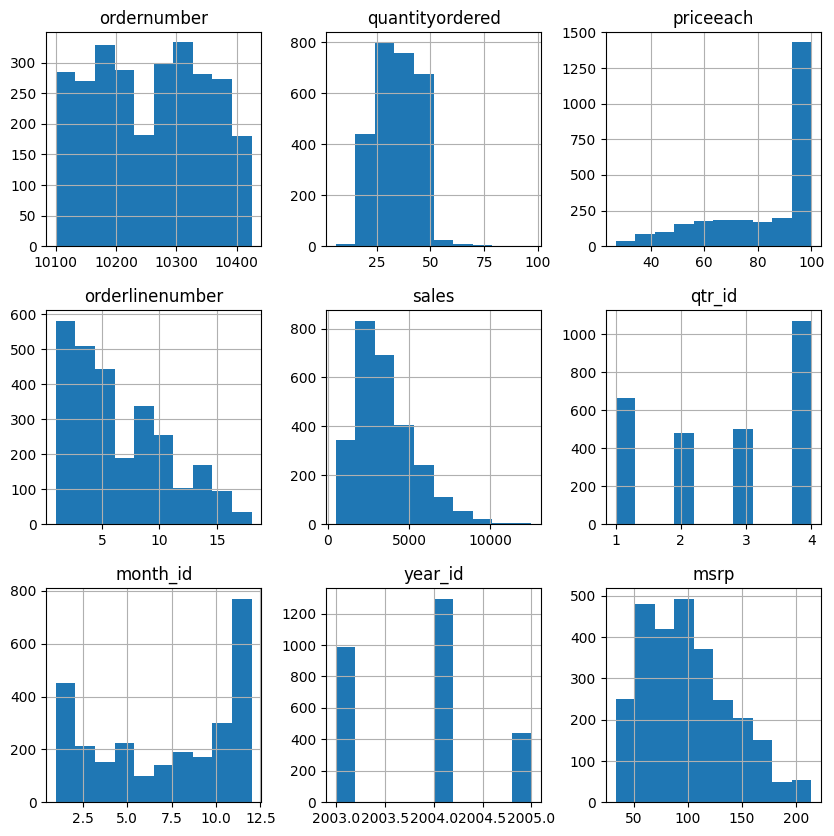

In [26]:
sales1.hist(figsize = (10,10))
plt.show()

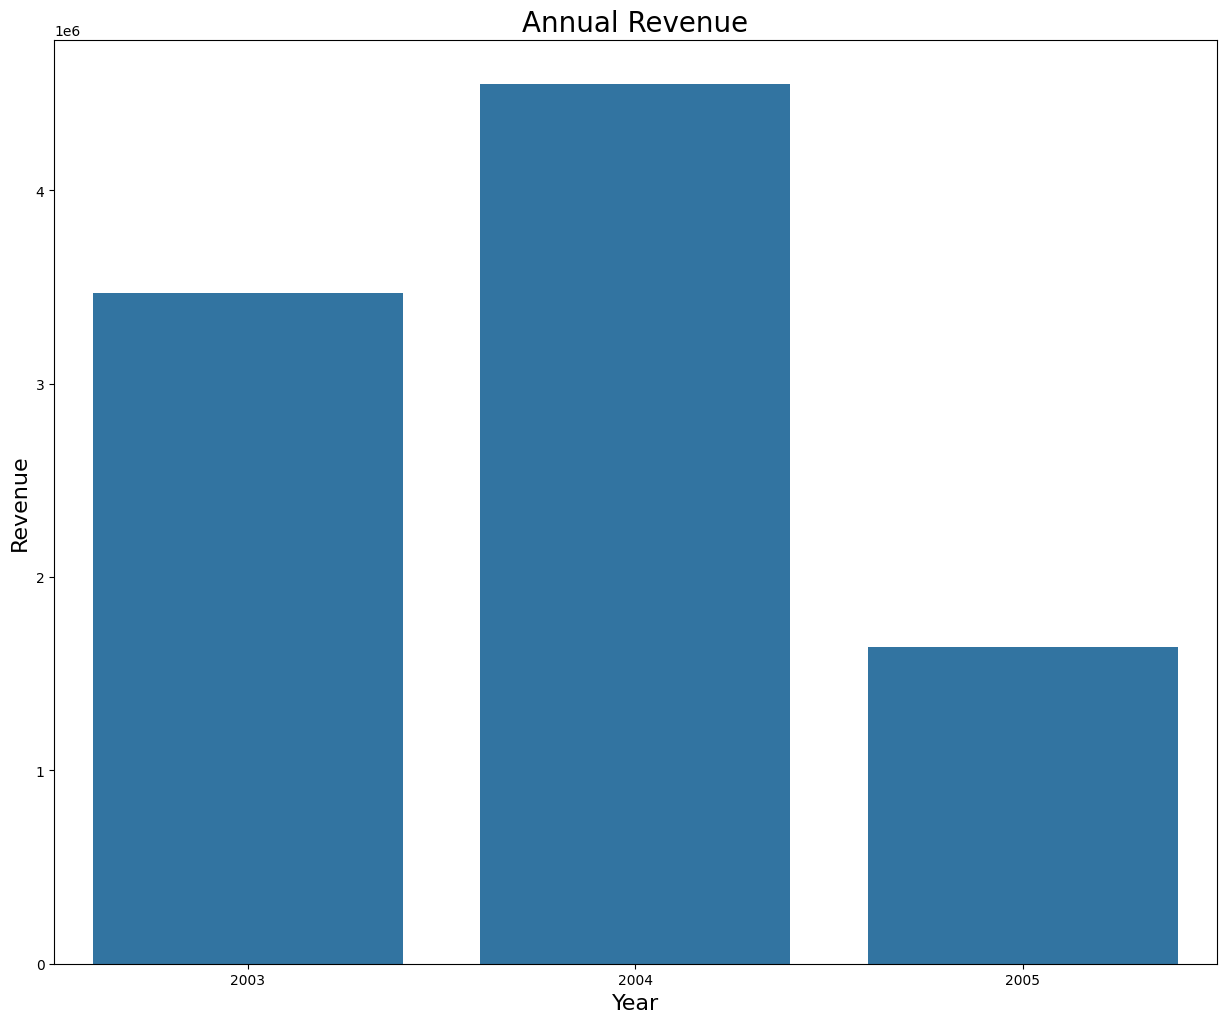

In [27]:
# Annual Revenue
plt.figure(figsize=(15,12))

#df1 = sales1.groupby('year_id').agg({'sales':'sum'}).rename(columns={'sales':'Revenue'})
#df1.reset_index(inplace=True)
#plt.bar(df1['year_id'],df1['Revenue'], width = 0.8)
yearly_revenue = sales1.groupby(['year_id'])['sales'].sum().reset_index()
sns.barplot(x="year_id", y="sales", data=yearly_revenue)

plt.title('Annual Revenue', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16)

plt.show()

<span style="font-size:18px;">Sales are increased from 2003 to 2004. Sales at 2005 is least but it doesn't contain whole year data.</span>

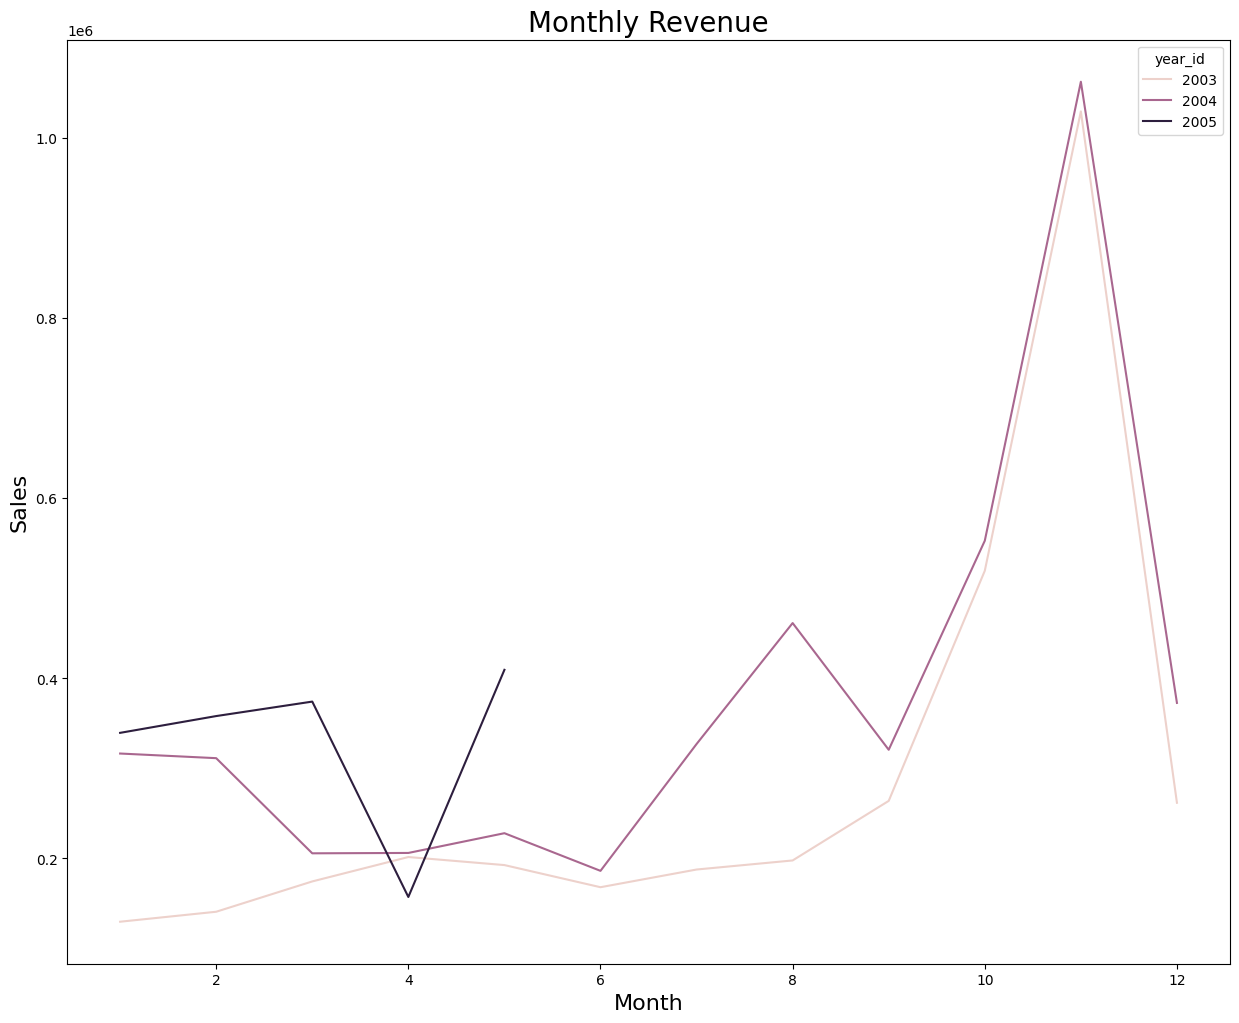

In [28]:
# Monthly Revenue
plt.figure(figsize=(15,12))

monthly_revenue = sales1.groupby(['year_id','month_id'])['sales'].sum().reset_index()

sns.lineplot(x="month_id", y="sales",hue="year_id", data=monthly_revenue)
plt.title('Monthly Revenue', fontsize = 20)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Sales', fontsize = 16)

plt.show()

<span style="font-size:18px;">2005 sales for the first 5 months are higher than previous years except for April. The monthly sales trends at peaked on November.</span>

In [29]:
# Discount Rate
sales1['discountrate'] = ((sales1['msrp']-sales1['priceeach'])/sales1['msrp'])*100
sales1[['priceeach','msrp','discountrate']]

<ipython-input-29-b38571c699ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales1['discountrate'] = ((sales1['msrp']-sales1['priceeach'])/sales1['msrp'])*100


,priceeach,msrp,discountrate
0,95.70,95,-0.736842
1,81.35,95,14.368421
2,94.74,95,0.273684
3,83.26,95,12.357895
4,100.00,95,-5.263158
...,...,...,...
2817,97.16,54,-79.925926
2818,100.00,54,-85.185185
2819,100.00,54,-85.185185
2820,100.00,54,-85.185185


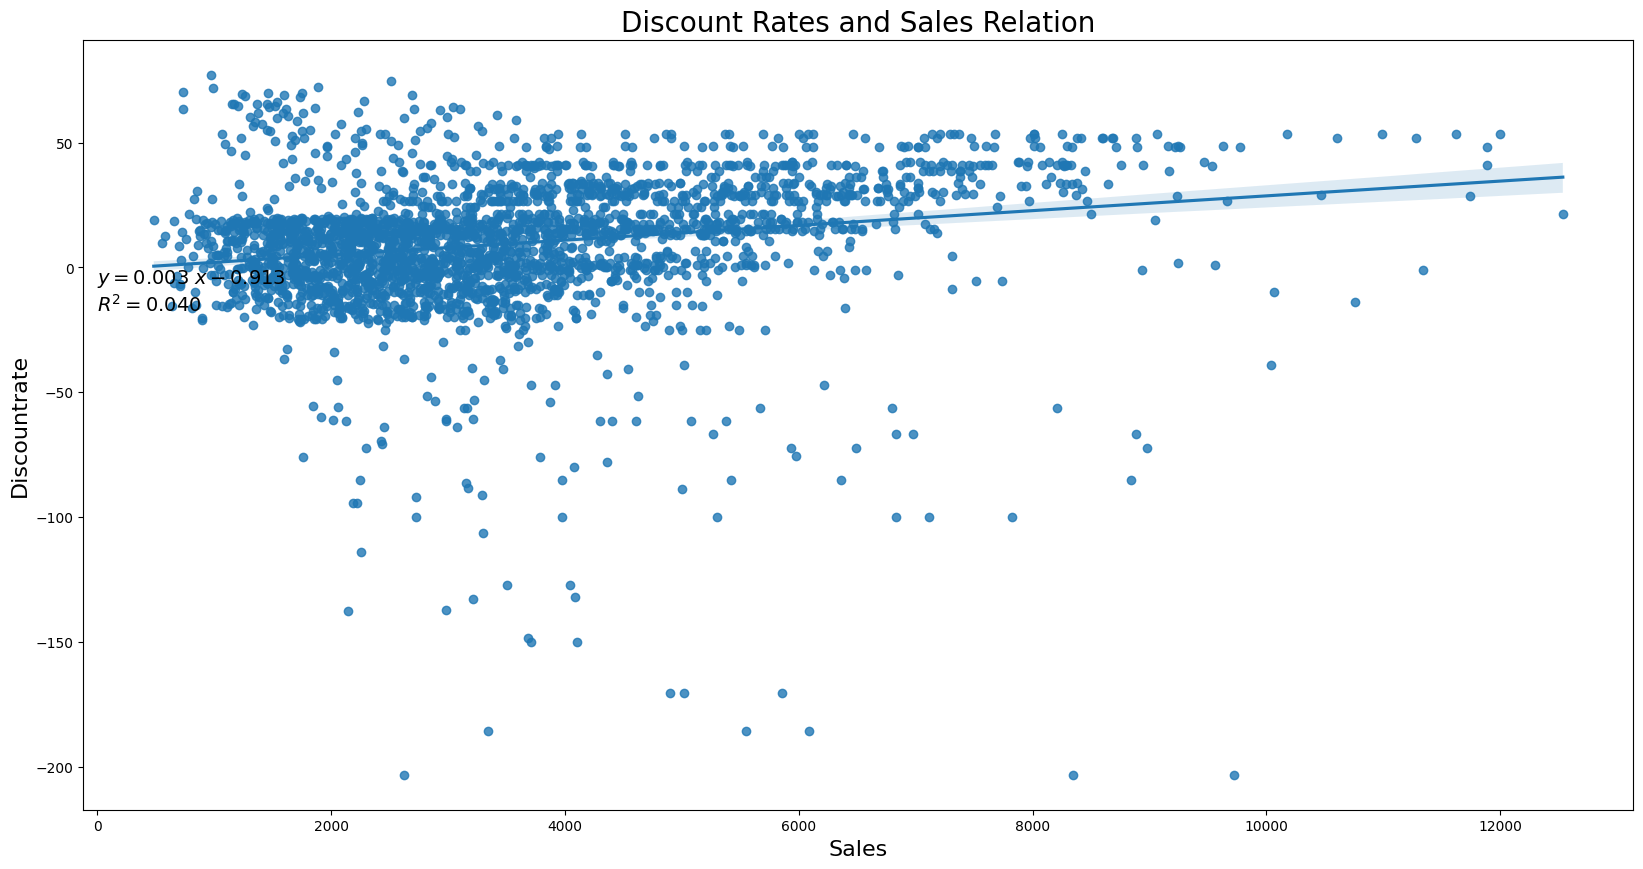

In [30]:
# Discount Rates and Sales Relation
plt.figure(figsize=(20,10))
sns.regplot(x = sales1['sales'], y = sales1['discountrate'])
plt.title('Discount Rates and Sales Relation', fontsize = 20)
plt.ylabel('Discountrate', fontsize = 16)
plt.xlabel('Sales', fontsize = 16)


x = sales1['sales']
y = sales1['discountrate']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,p(x)):0.3f}$"
plt.gca().text(0.05, 0.05, text, fontsize=14, verticalalignment='top')
plt.show()

<span style="font-size:18px;">There is no relationship between discount rates and sales.</span>

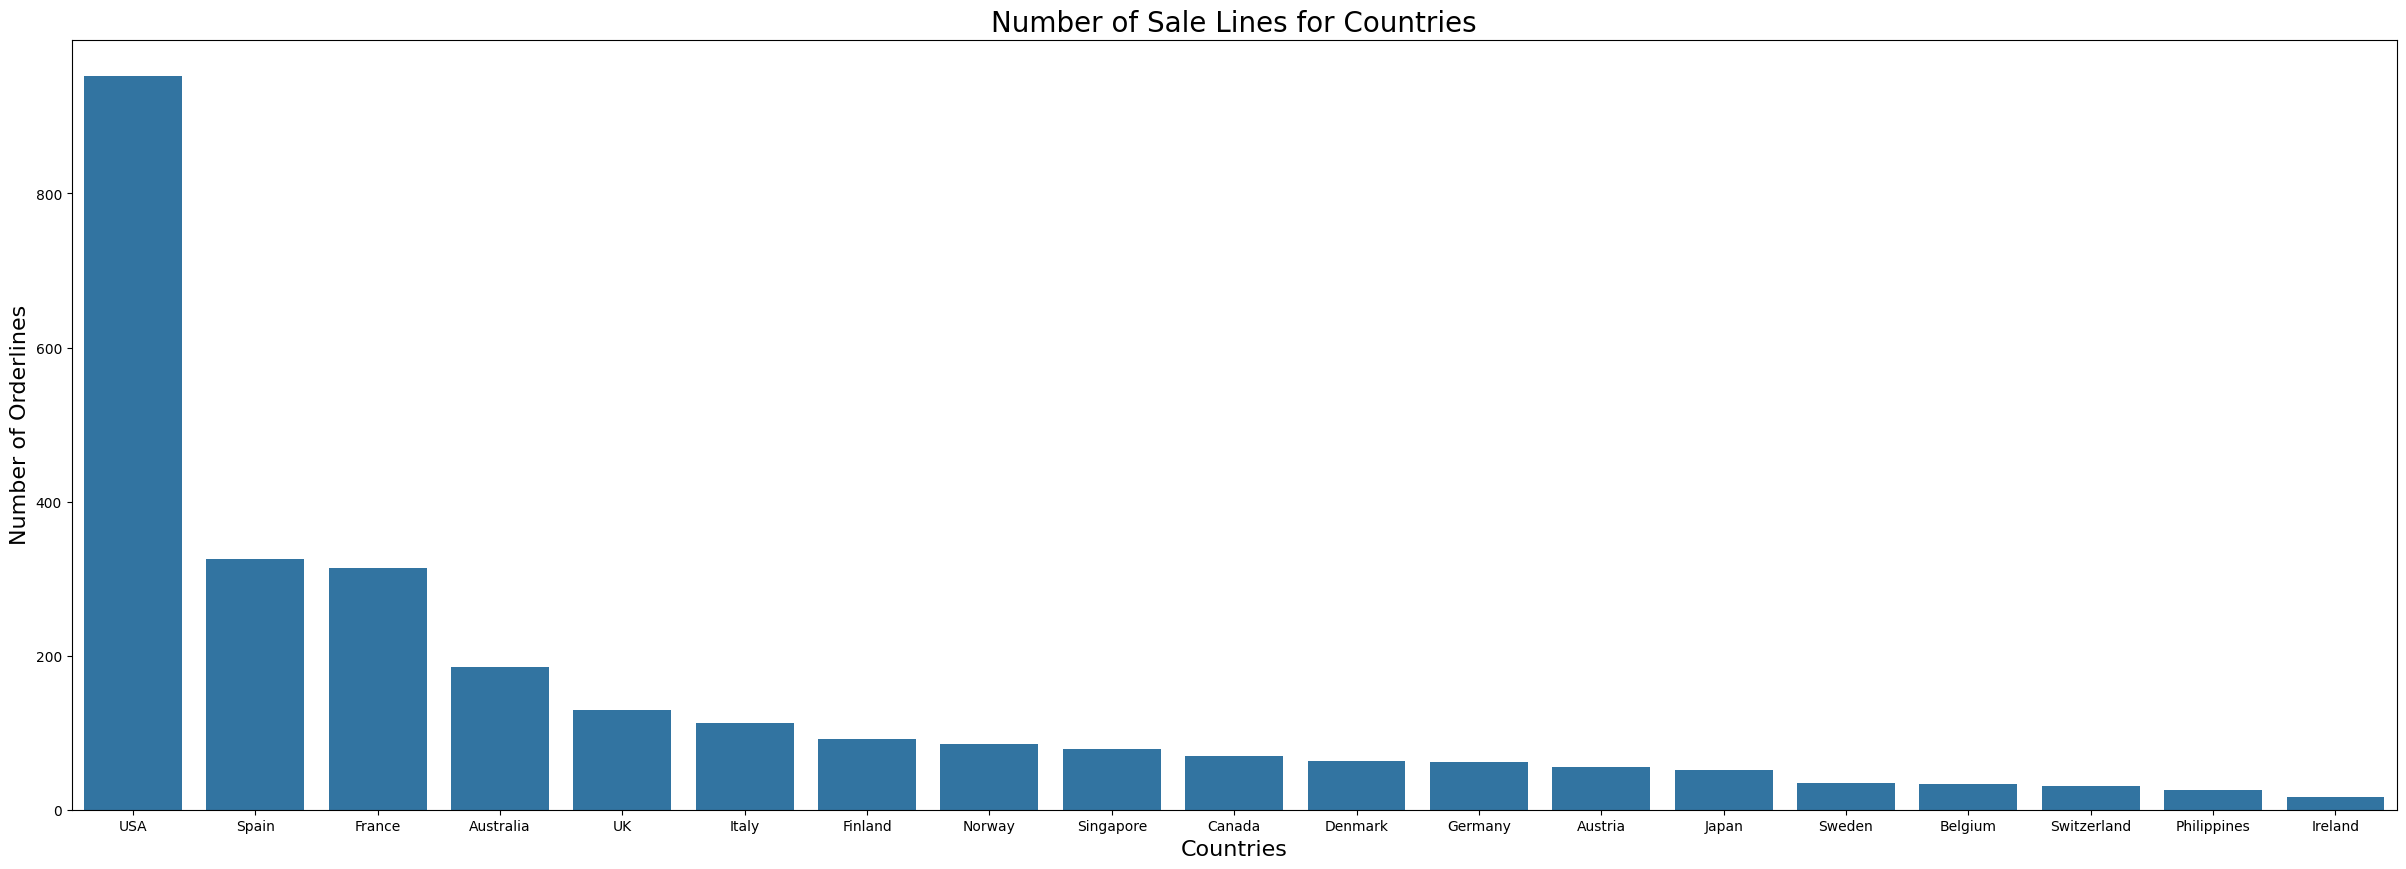

In [31]:
# Number of Sale Lines for Countries

plt.figure(figsize=(30,10))
sns.countplot(x = sales1['country'], order = sales1['country'].value_counts().index )
plt.title('Number of Sale Lines for Countries', fontsize = 20)
plt.ylabel('Number of Orderlines', fontsize = 16)
plt.xlabel('Countries', fontsize = 16)
plt.show()

<span style="font-size:18px;">The most of sales are happened at USA. Spain and France are the second and third most sold countries</span>

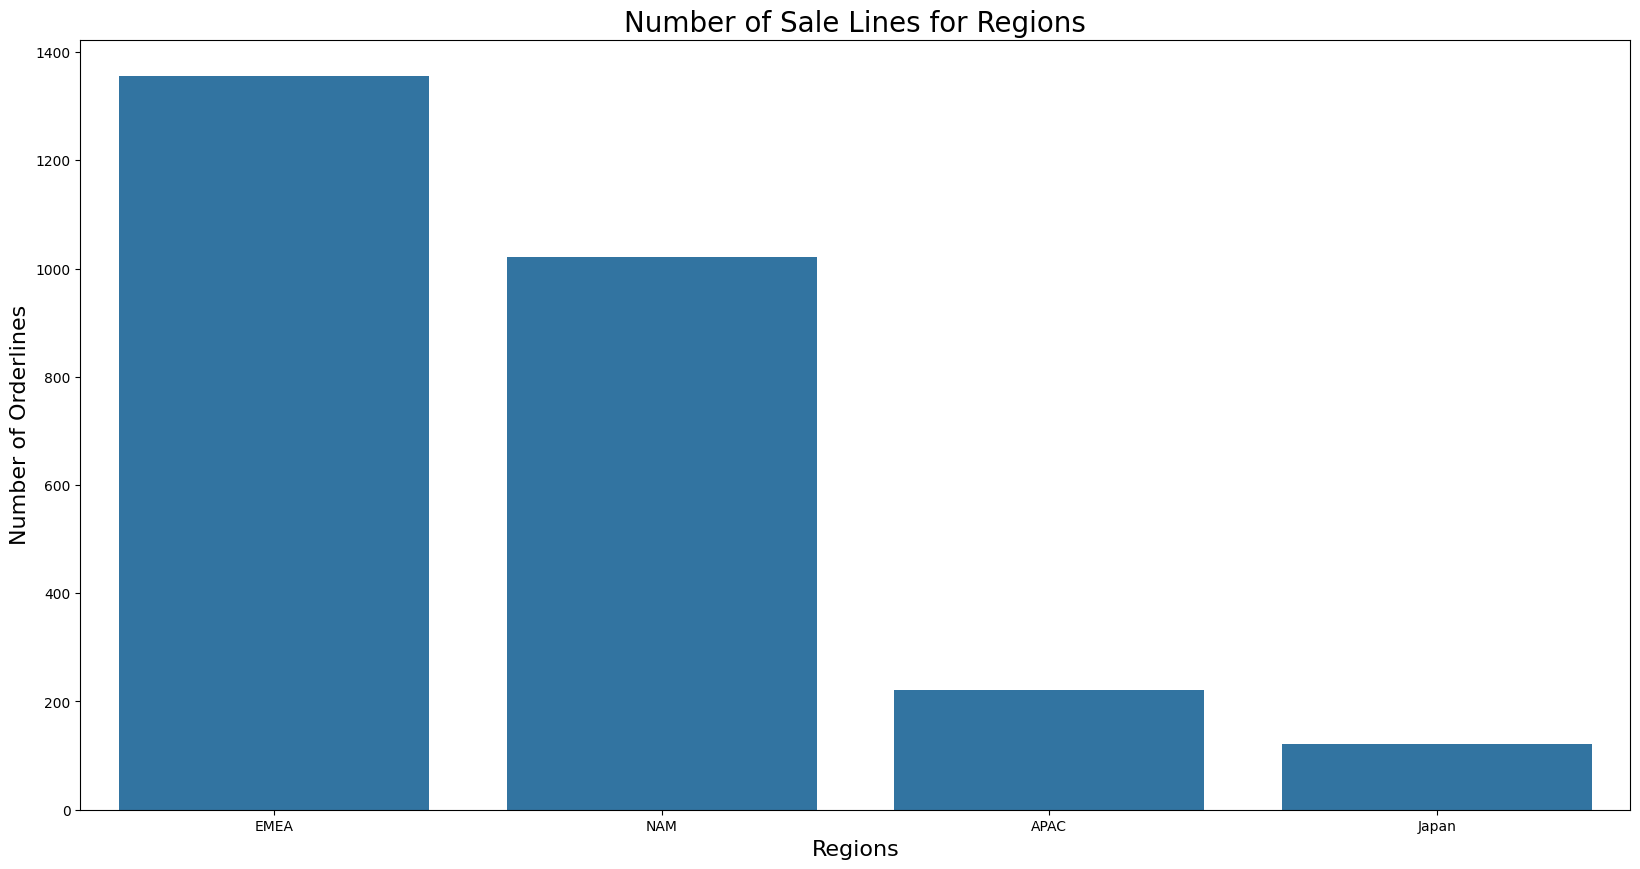

In [32]:
# Number of Sale Lines for Regions
plt.figure(figsize=(20,10))
sns.countplot(x = sales1['territory'], order = sales1['territory'].value_counts().index )
plt.title('Number of Sale Lines for Regions', fontsize = 20)
plt.ylabel('Number of Orderlines', fontsize = 16)
plt.xlabel('Regions', fontsize = 16)
plt.show()

<span style="font-size:18px;">The most of sales are happened at EMEA region. The NAM region which USA is in it is the second most sold region.</span>

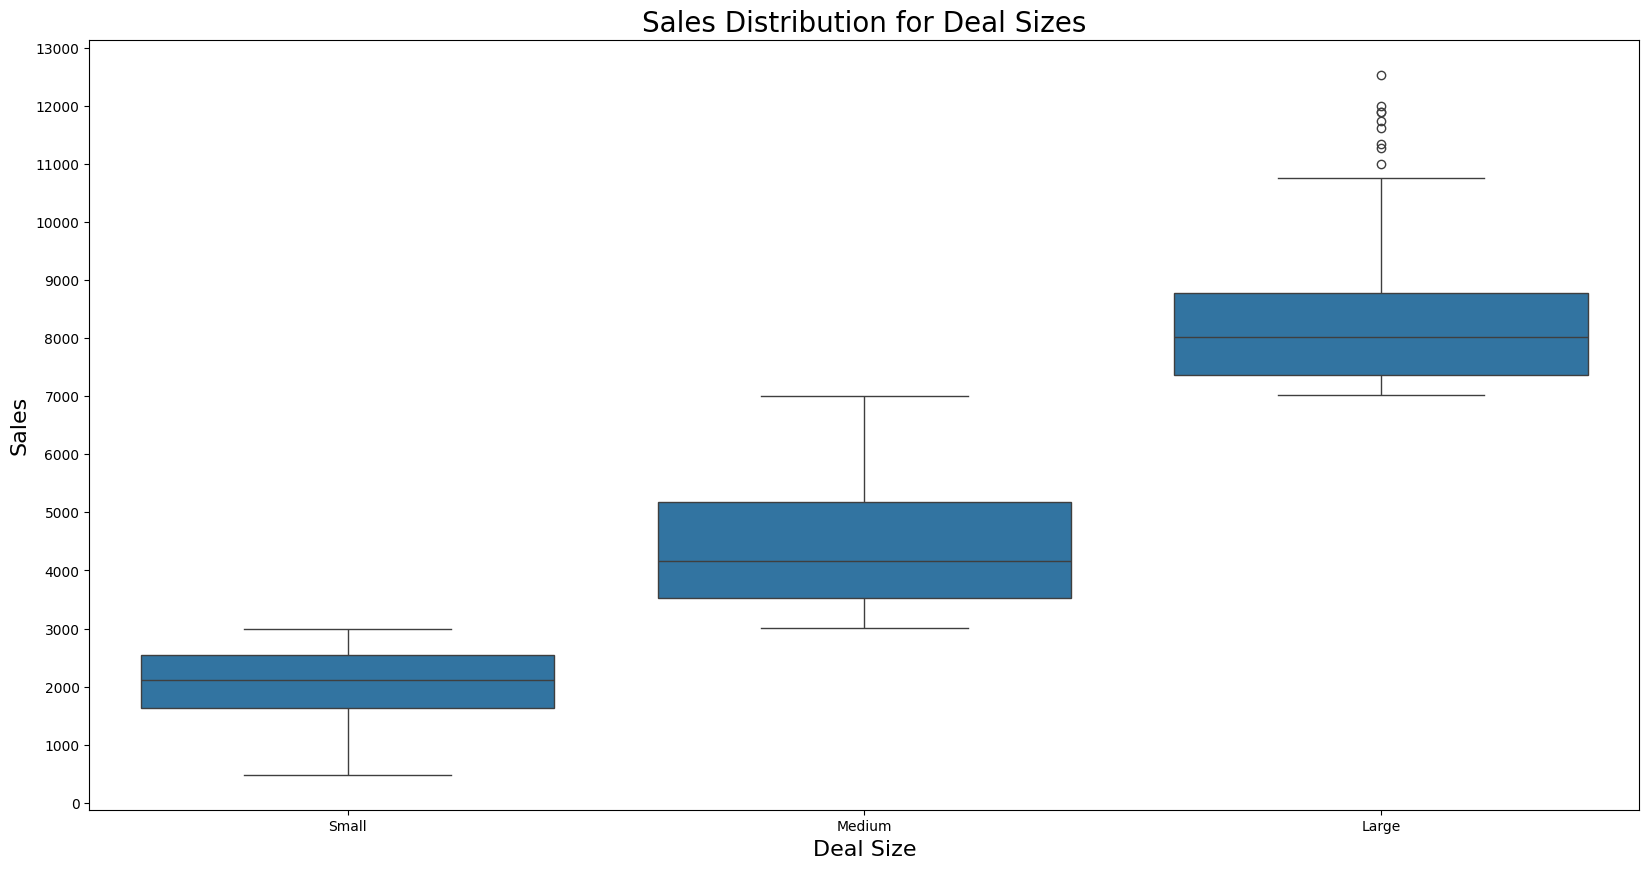

In [33]:
# Sales Distribution for Dealsizes
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,14000,1000))
sns.boxplot(x = sales1['dealsize'], y = sales1['sales'])
plt.title('Sales Distribution for Deal Sizes', fontsize = 20)
plt.ylabel('Sales', fontsize = 16)
plt.xlabel('Deal Size', fontsize = 16)
plt.show()

<span style="font-size:18px;">Small sales are sales between 0 and 3000. Medium sales are sales between 3000 and 7000. Large sales are the sales higher than 7000.</span>

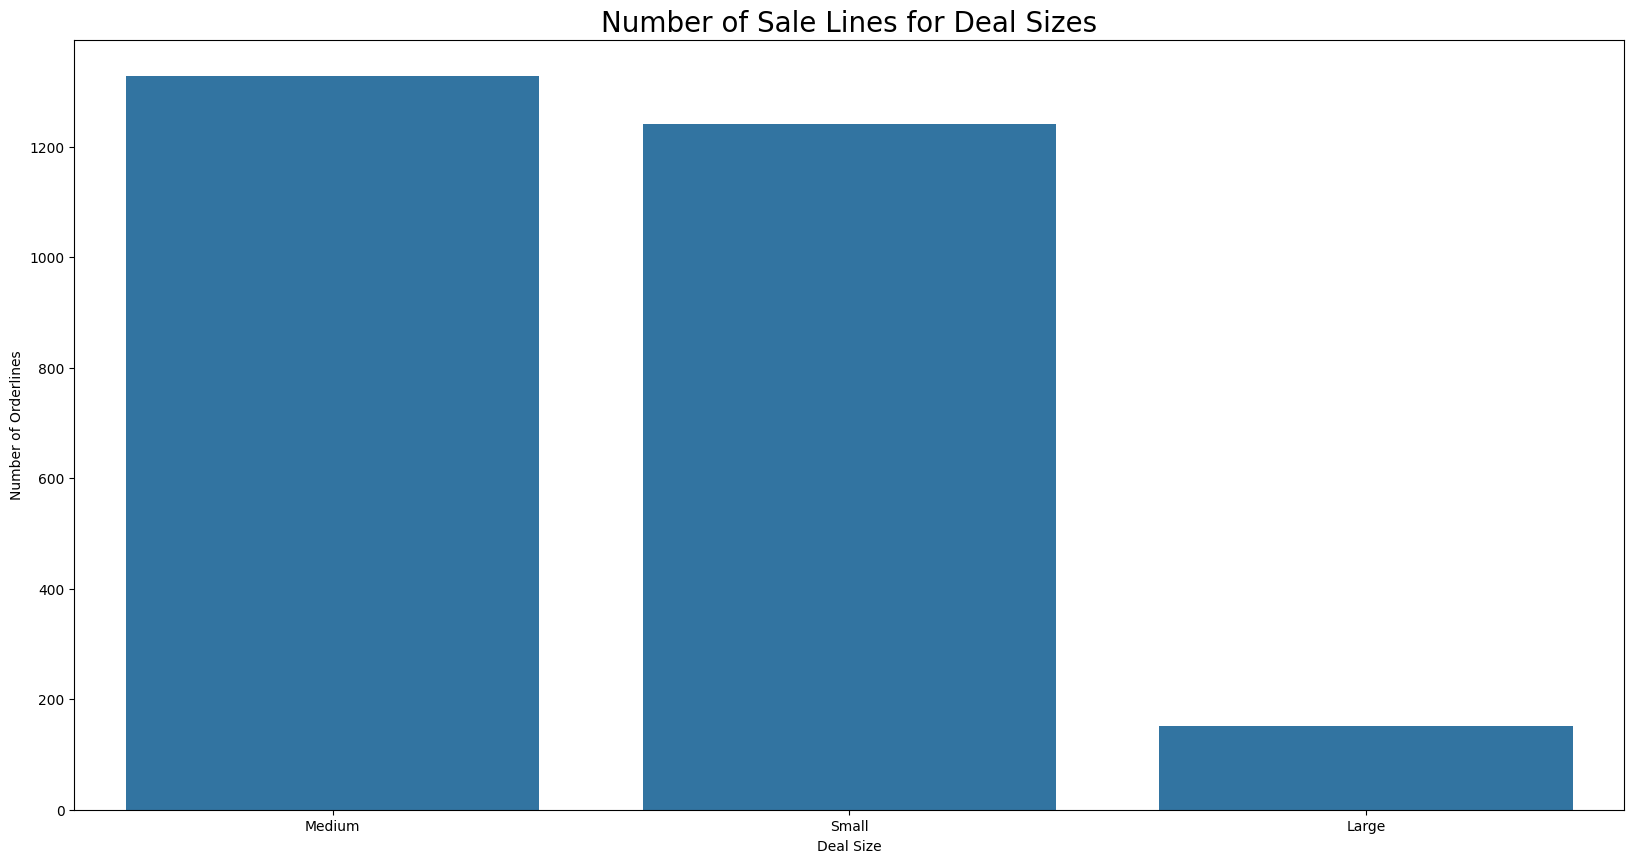

In [34]:
# Number of Sale Lines for Deal Size
plt.figure(figsize=(20,10))
sns.countplot(x = sales1['dealsize'], order = sales1['dealsize'].value_counts().index )
plt.title('Number of Sale Lines for Deal Sizes', fontsize = 20)
plt.ylabel('Number of Orderlines')
plt.xlabel('Deal Size')
plt.show()

<span style="font-size:18px;">Small sales are sales between 0 and 3000. Medium sales are sales between 3000 and 7000. Large sales are the sales higher than 7000.</span>

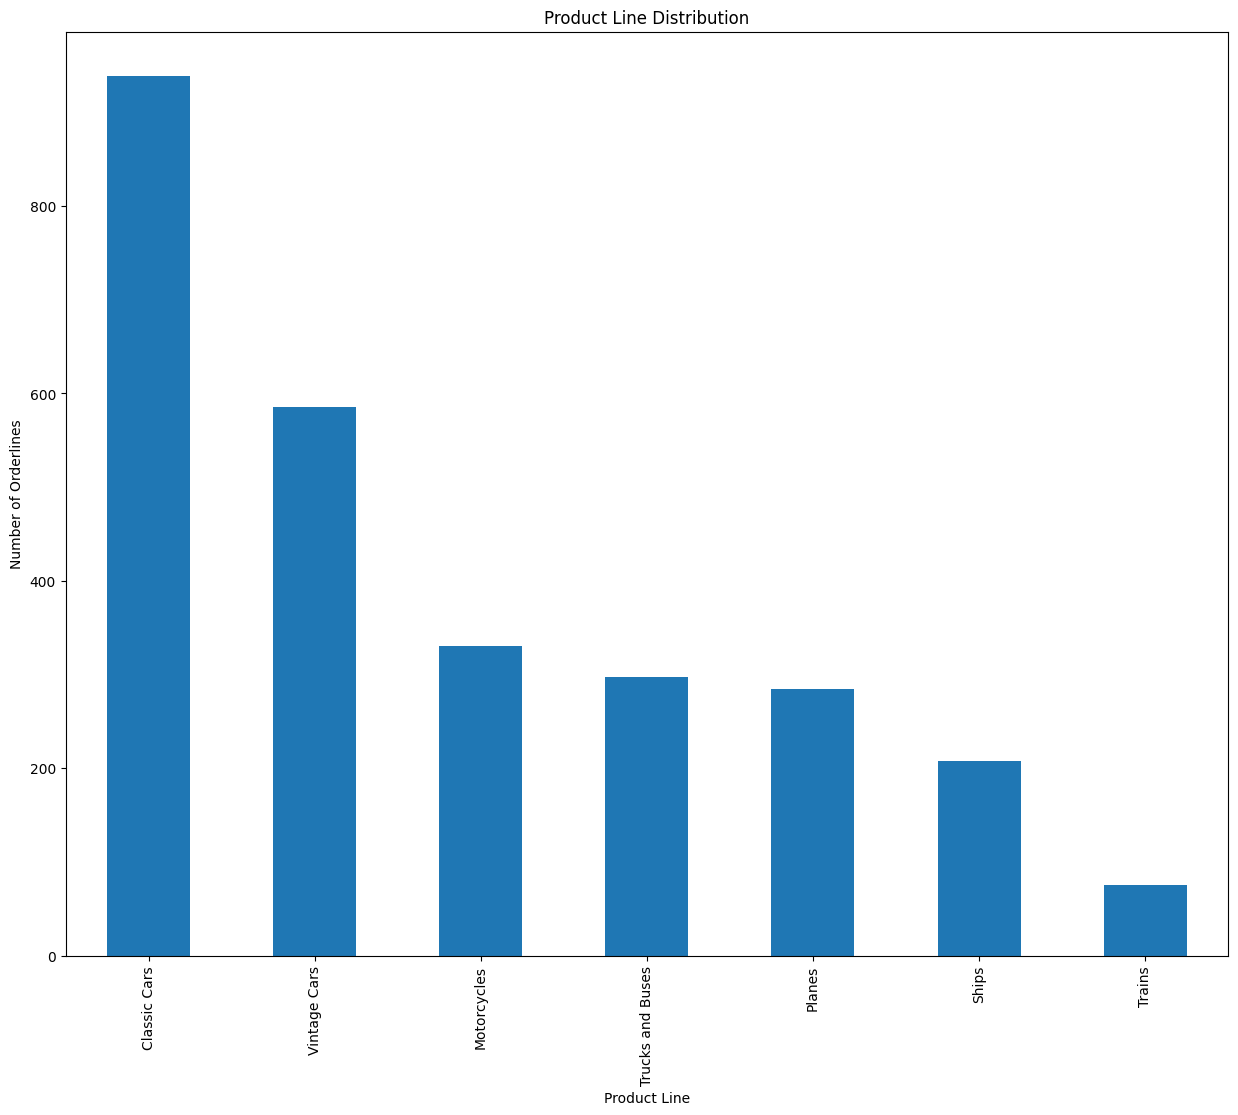

In [35]:
plt.figure(figsize=(15,12))
sales1['productline'].value_counts().plot(kind = 'bar')
plt.title('Product Line Distribution')
plt.xlabel('Product Line')
plt.ylabel('Number of Orderlines')
plt.show()

<span style="font-size:18px;">The most of the sales are belong Classic Cars category. Vintage Cars and Motorcycles are the second and third ones. The least of sales are happened in Trains category.</span>

<ipython-input-36-21e616fa4bc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales1['year_month'] = sales1['year_id'].map(str)+sales1['month_id'].map(str).map(lambda x: x.rjust(2,'0'))


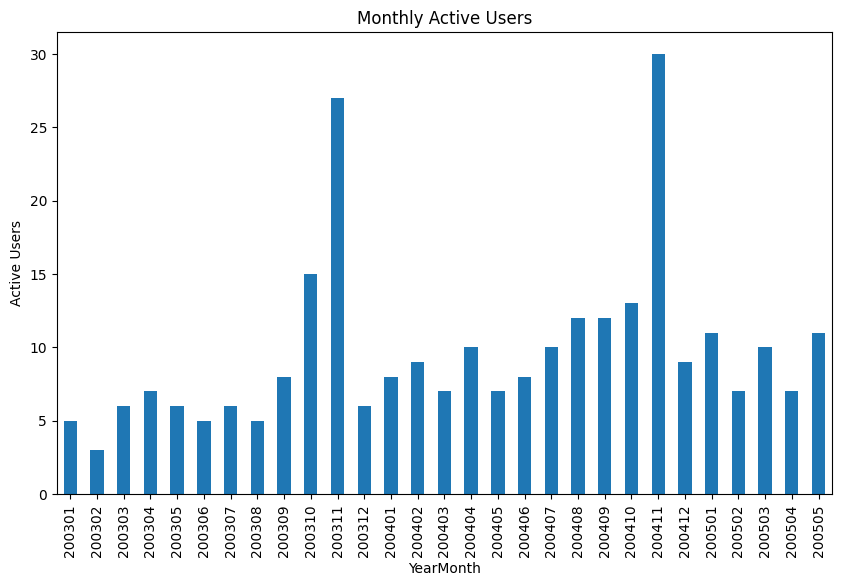

In [36]:
# Monthly Active Users
sales1['year_month'] = sales1['year_id'].map(str)+sales1['month_id'].map(str).map(lambda x: x.rjust(2,'0'))

plt.figure(figsize=(10,6))
sales1.groupby(['year_month'])['customername'].nunique().plot(kind='bar')
plt.title('Monthly Active Users')
plt.xlabel('YearMonth')
plt.ylabel('Active Users')
plt.show()

<span style="font-size:18px;">The monthly active users show similar trend to sales. The active users are peaked at most sold months.</span>